# Import Cleaned Data & Packages

In [88]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import statsmodels.api as sm
import statsmodels.stats.api as sms
import statsmodels.formula.api as smf
import scipy.stats as stats
from statsmodels.formula.api import ols
from sklearn.linear_model import LinearRegression 
from sklearn.metrics import mean_squared_error

In [89]:
#See part 4 for scrubbing process

df  = pd.read_csv('cleaned_df_zipcodes')
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,zipcode,lat,long,sqft_living15,sqft_lot15,yr_sold,home_age,yrs_since_reno
0,221900.0,3,1.00,1180,5650,1.0,0.0,0.0,3,7,1180,0,98178,47.5112,-122.257,1340,5650,2014,65,2020
1,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,3,7,2170,400,98125,47.7210,-122.319,1690,7639,2014,69,29
2,180000.0,2,1.00,770,10000,1.0,0.0,0.0,3,6,770,0,98028,47.7379,-122.233,2720,8062,2015,87,2020
3,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,5,7,1050,910,98136,47.5208,-122.393,1360,5000,2014,55,2020
4,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,3,8,1680,0,98074,47.6168,-122.045,1800,7503,2015,33,2020


# Bucketing data


In [90]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21188 entries, 0 to 21187
Data columns (total 20 columns):
price             21188 non-null float64
bedrooms          21188 non-null int64
bathrooms         21188 non-null float64
sqft_living       21188 non-null int64
sqft_lot          21188 non-null int64
floors            21188 non-null float64
waterfront        21188 non-null float64
view              21188 non-null float64
condition         21188 non-null int64
grade             21188 non-null int64
sqft_above        21188 non-null int64
sqft_basement     21188 non-null int64
zipcode           21188 non-null int64
lat               21188 non-null float64
long              21188 non-null float64
sqft_living15     21188 non-null int64
sqft_lot15        21188 non-null int64
yr_sold           21188 non-null int64
home_age          21188 non-null int64
yrs_since_reno    21188 non-null int64
dtypes: float64(7), int64(13)
memory usage: 3.2 MB


In [91]:
#Adding a new column to replace the sqft_basement
#sqft_basement data is very skewed since any house w/o a basement was assigned 0 
#(see part 2)

df.loc[df['sqft_basement'] == 0, 'has_basement'] = 0
df.loc[df['sqft_basement'] != 0, 'has_basement'] = 1

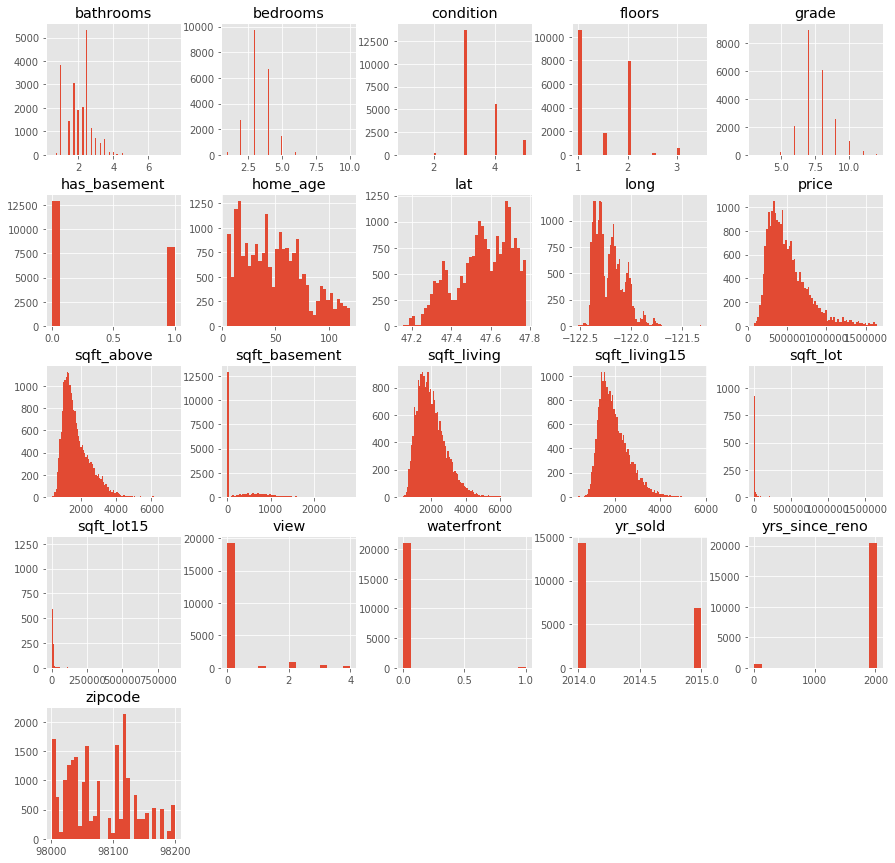

In [92]:
df.hist(bins = 'auto', figsize = (15,15));

In [93]:
#splitting continous and categorical variables
#Dropping sqft_basement

#Categorical df 

df_cat = df[['yrs_since_reno','waterfront','view','condition','grade','has_basement',
            'yr_sold','zipcode']].copy()

#Numerical df

df_num = df[['bathrooms','bedrooms','floors','home_age','price','sqft_above','sqft_living','sqft_living15',
            'sqft_lot','sqft_lot15']].copy()


# Removing outliers in df_num

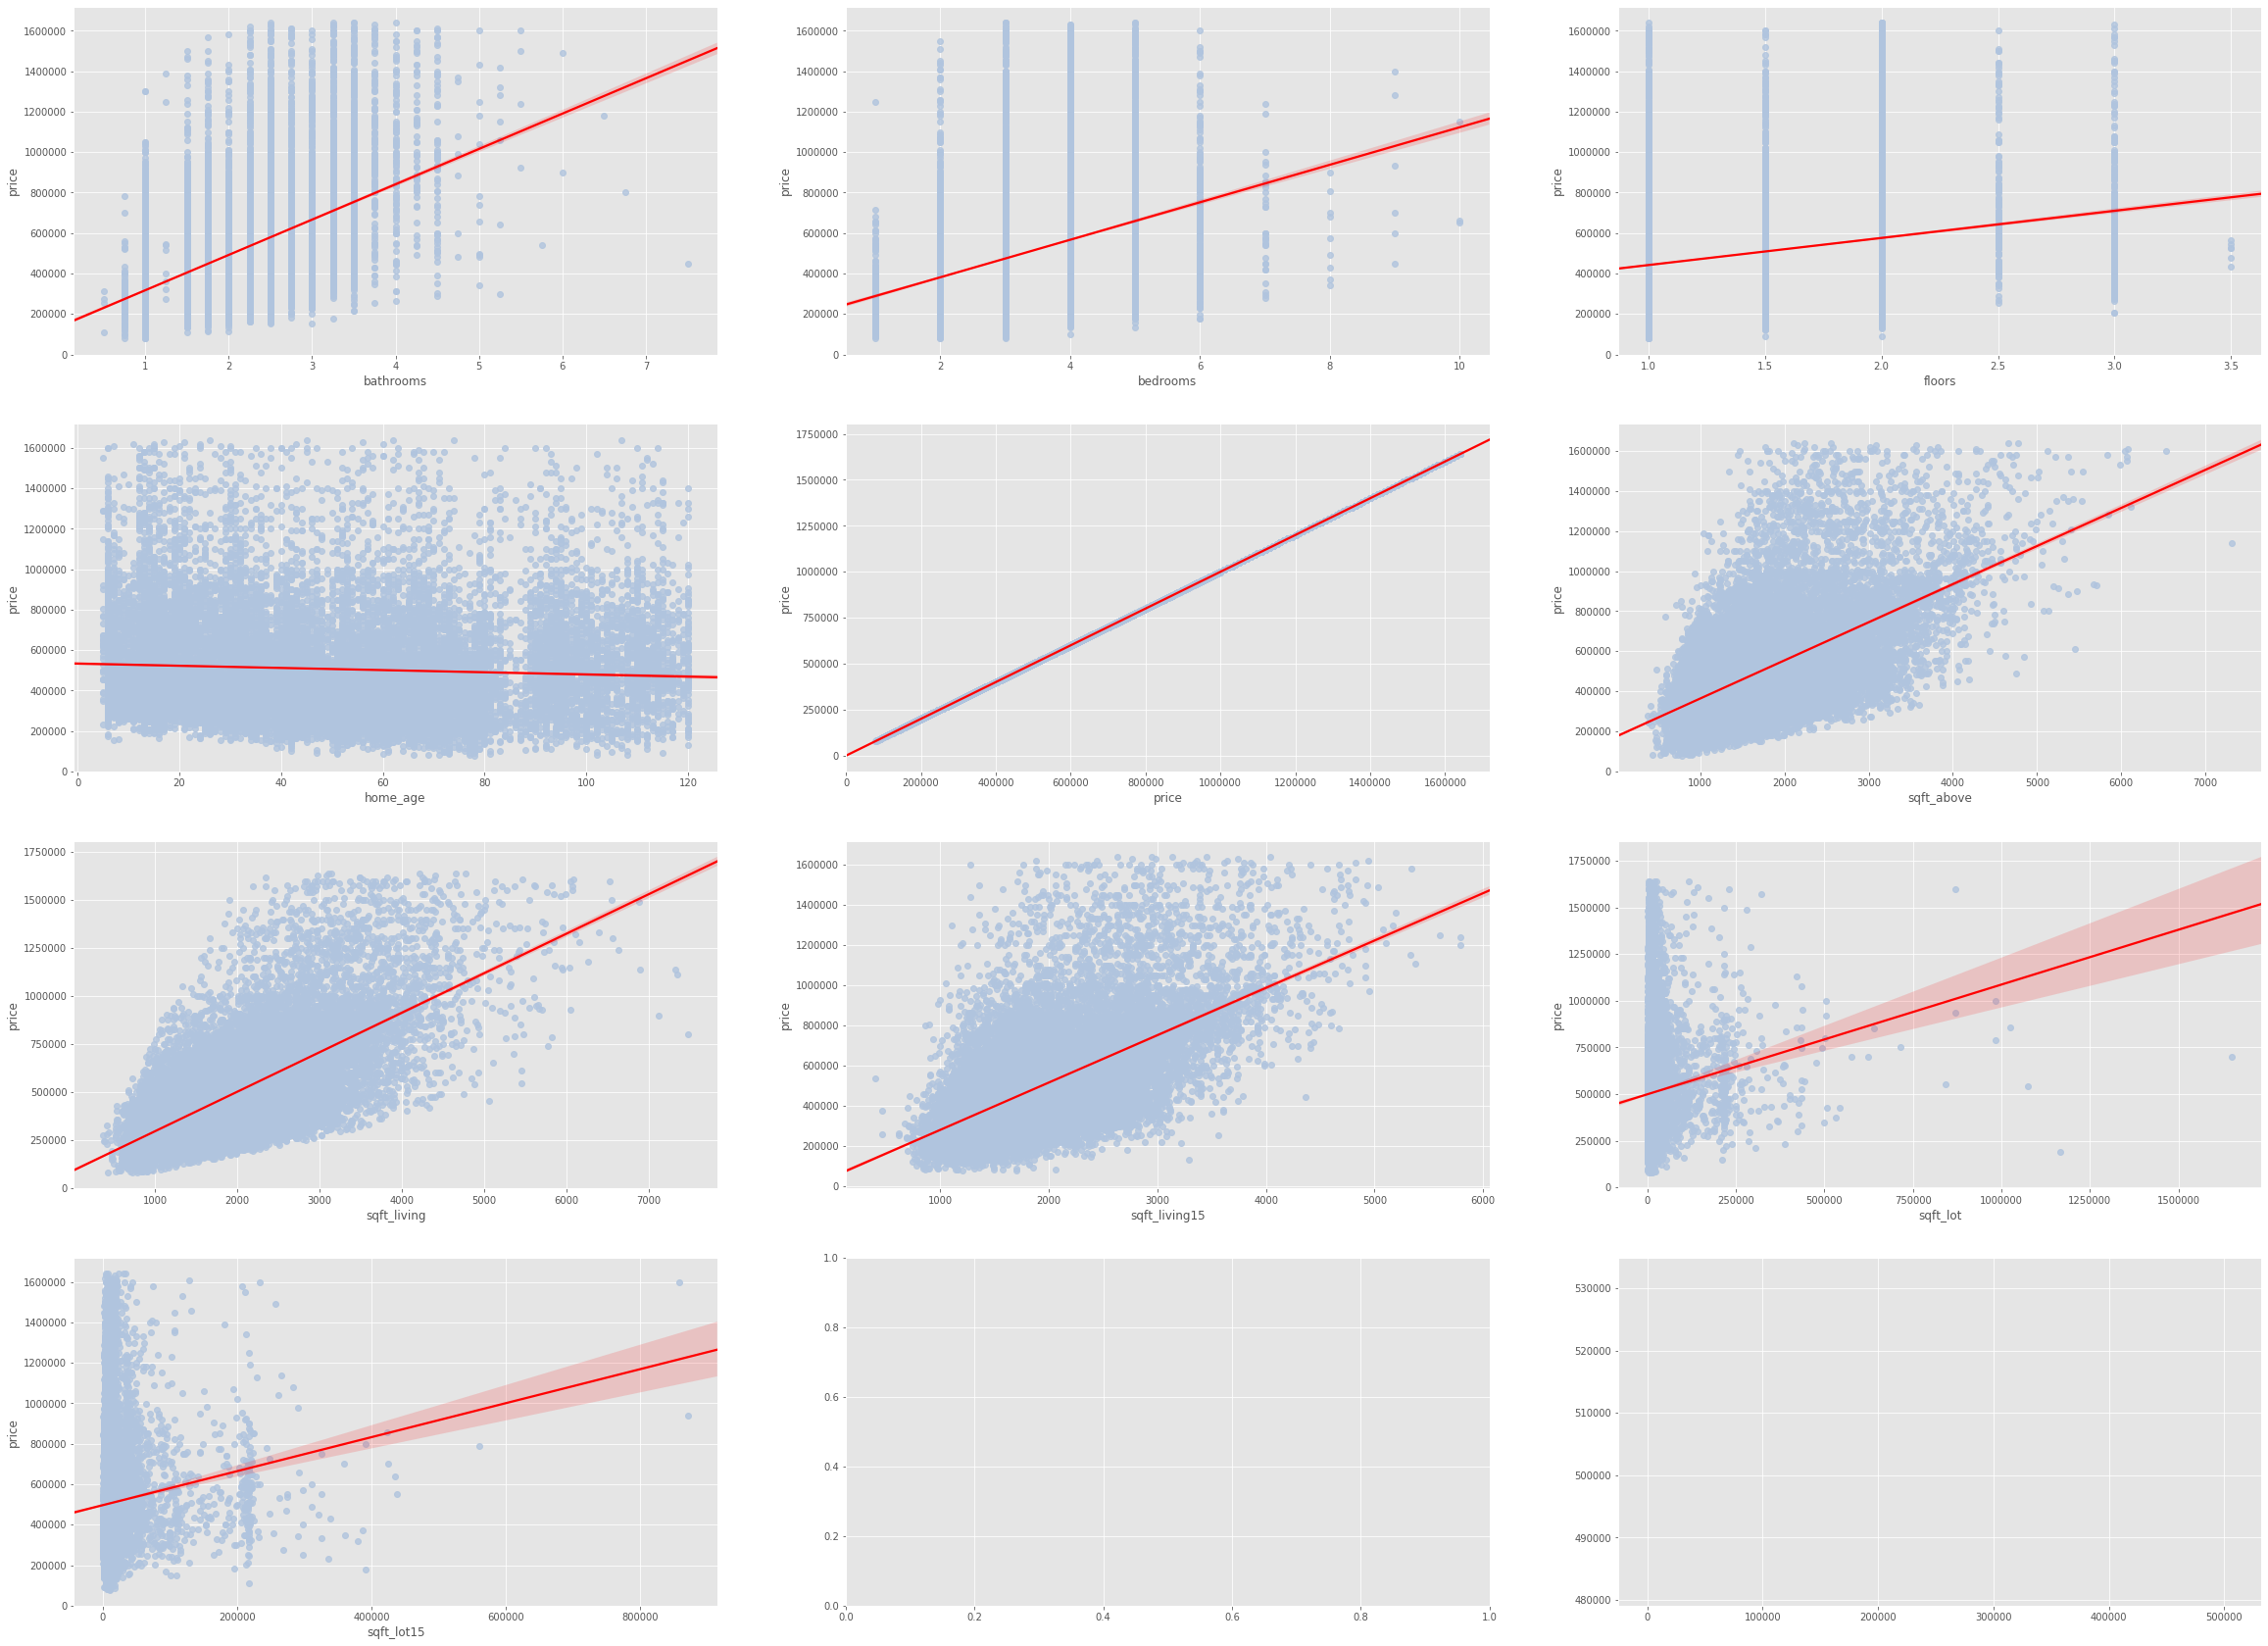

In [94]:
fig, axes = plt.subplots(4, 3,figsize=(40,30))
axes = axes.flatten()
for i, (feature, ax) in enumerate(zip(df_num, axes), 1):
    sns.regplot(data=df_num, x=feature, y='price', ax=ax,scatter_kws = {'color': 'lightsteelblue'}
                ,line_kws = {'color': 'red'})

In [95]:
#sqft_lot appears to have many outliers
#Otherwise, it is difficult to tell
#Going to leverage z-score

In [96]:
df_no_outliers = df_num[(np.abs(stats.zscore(df_num)) < 3).all(axis=1)]
df_no_outliers

,bathrooms,bedrooms,floors,home_age,price,sqft_above,sqft_living,sqft_living15,sqft_lot,sqft_lot15
0,1.00,3,1.0,65,221900.0,1180,1180,1340,5650,5650
1,2.25,3,2.0,69,538000.0,2170,2570,1690,7242,7639
2,1.00,2,1.0,87,180000.0,770,770,2720,10000,8062
3,3.00,4,1.0,55,604000.0,1050,1960,1360,5000,5000
4,2.00,3,1.0,33,510000.0,1680,1680,1800,8080,7503
...,...,...,...,...,...,...,...,...,...,...
21183,2.50,3,3.0,11,360000.0,1530,1530,1530,1131,1509
21184,2.50,4,2.0,6,400000.0,2310,2310,1830,5813,7200
21185,0.75,2,2.0,11,402101.0,1020,1020,1020,1350,2007
21186,2.50,3,2.0,16,400000.0,1600,1600,1410,2388,1287


In [97]:
#Repeating regplots

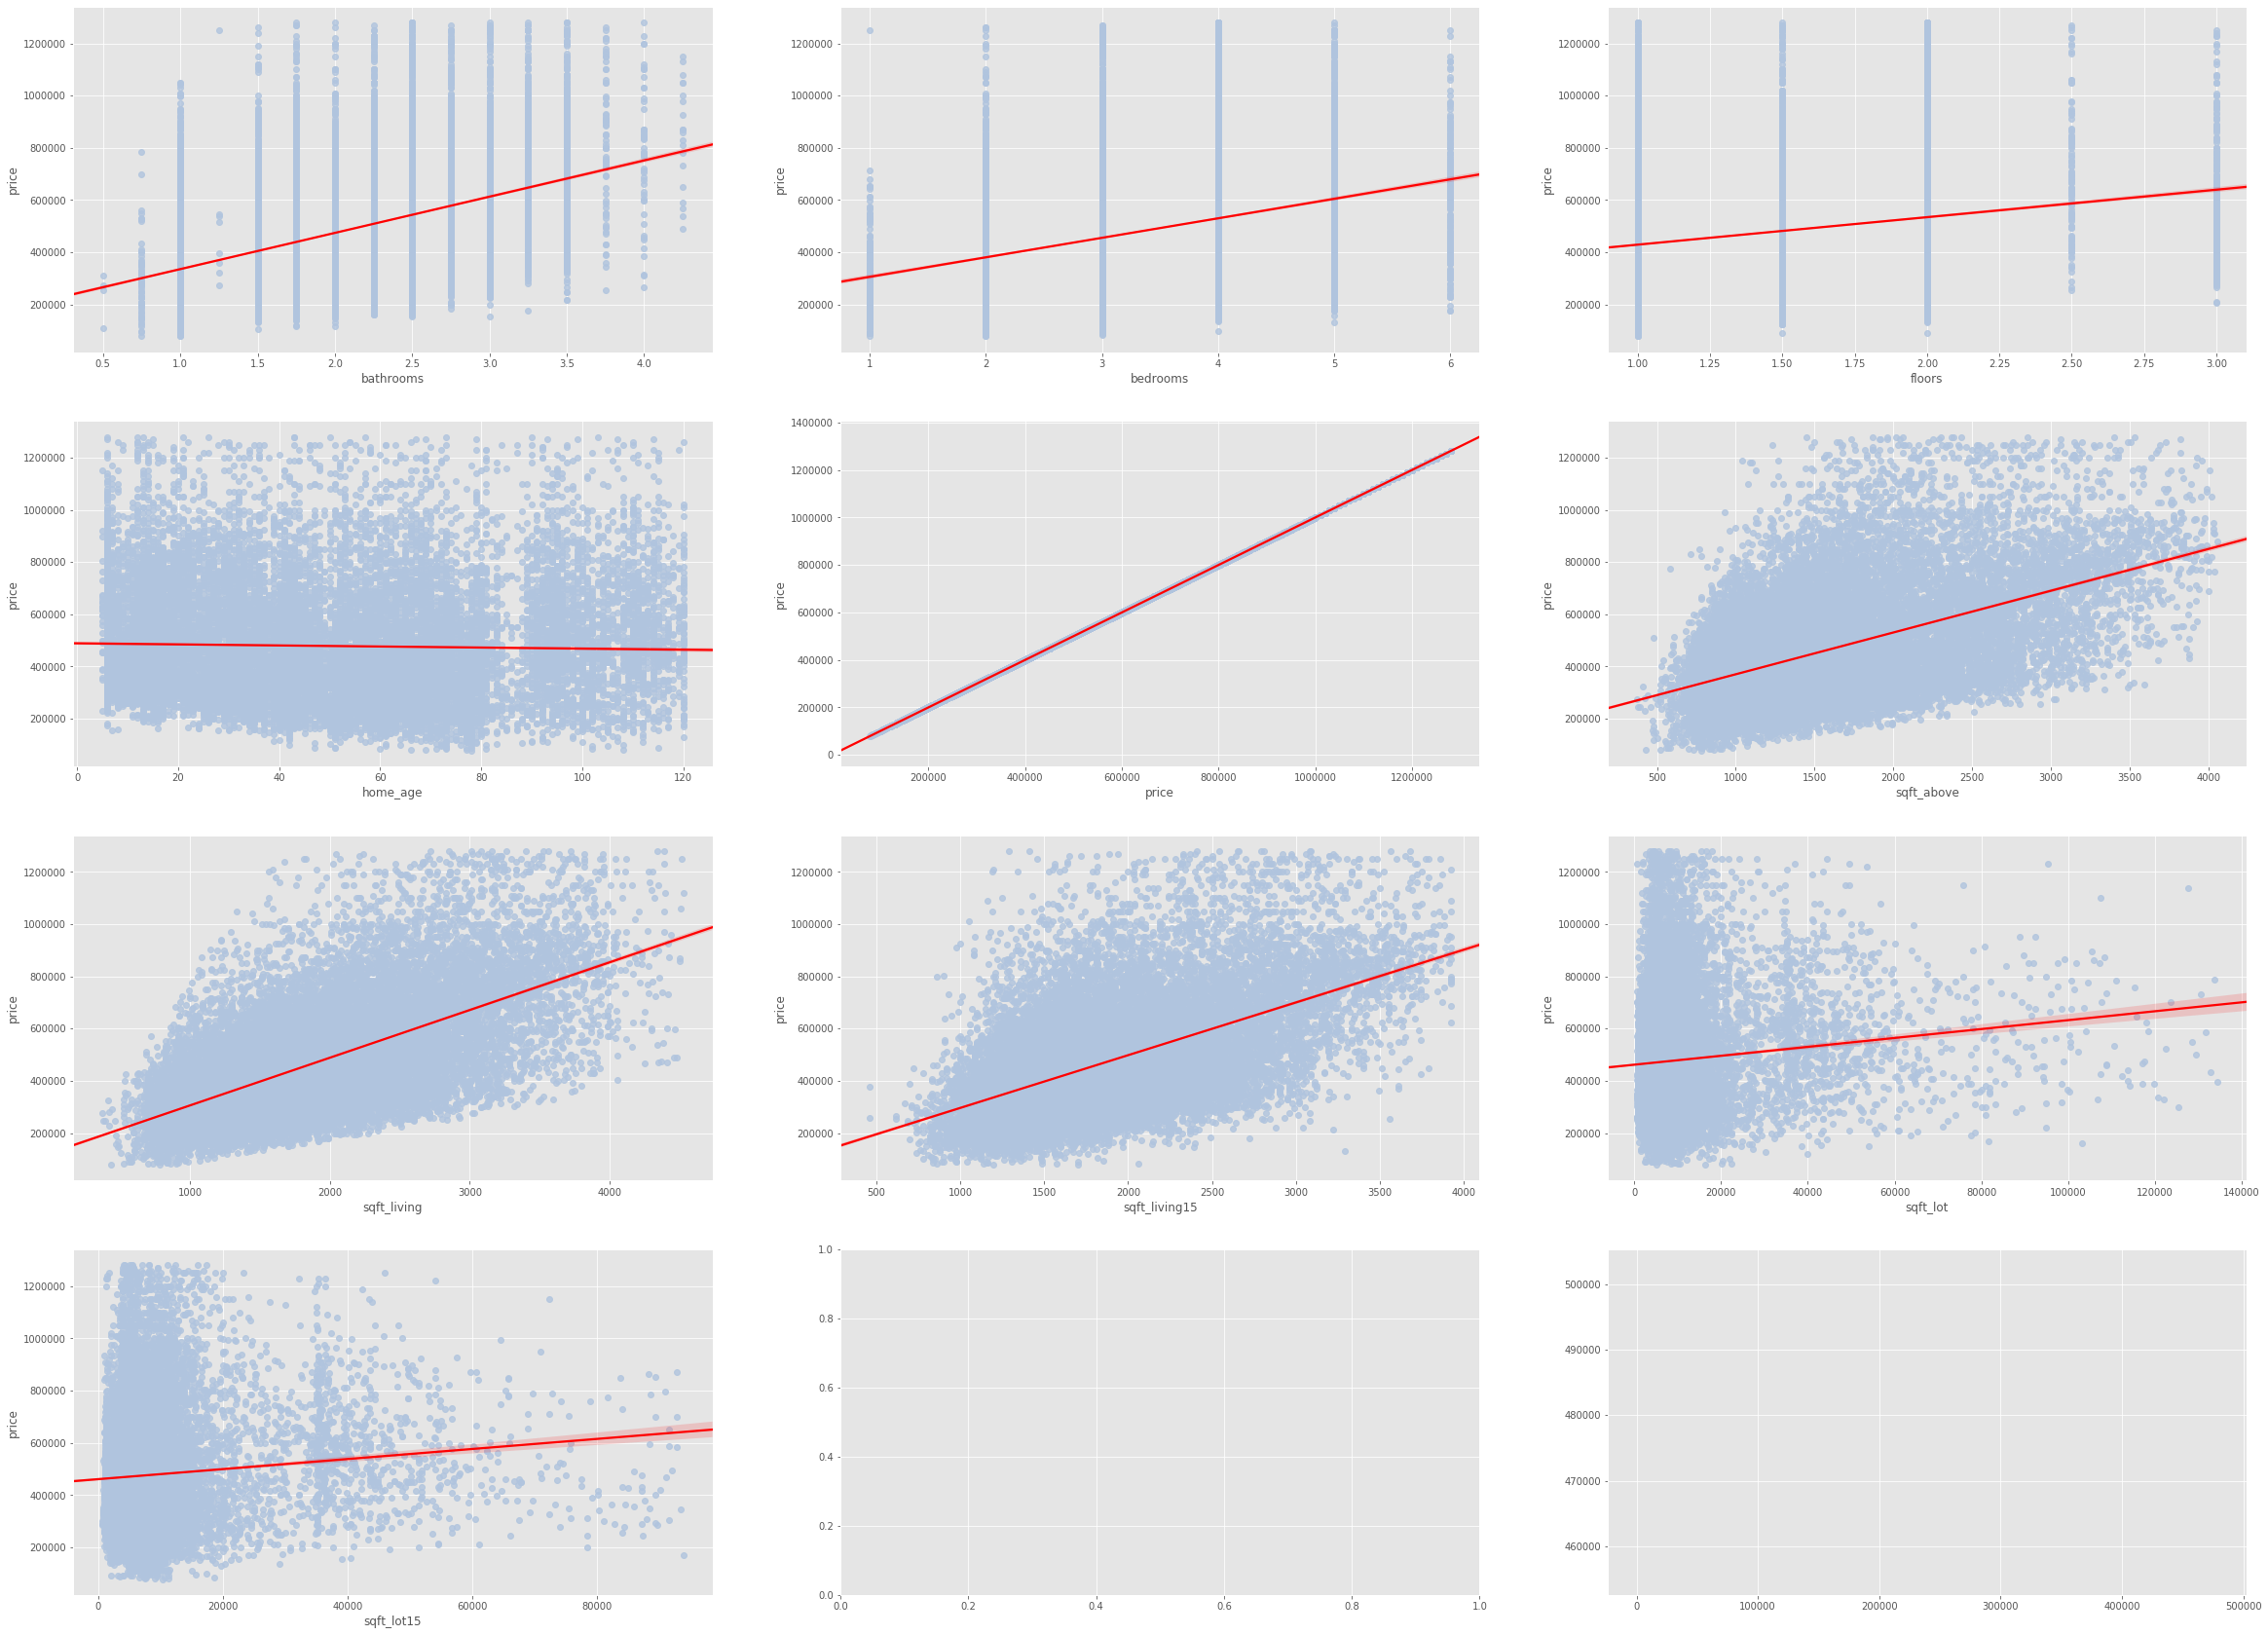

In [98]:
fig, axes = plt.subplots(4, 3,figsize=(40,30))
axes = axes.flatten()
for i, (feature, ax) in enumerate(zip(df_no_outliers, axes), 1):
    sns.regplot(data=df_no_outliers, x=feature, y='price', ax=ax,scatter_kws = {'color': 'lightsteelblue'}
                ,line_kws = {'color': 'red'})

In [99]:
#Plots appear more normal

In [100]:
#Performing simple linear regression for each variable 
#Determining which are most correlated with price

In [101]:
linreg = LinearRegression() 

for col in df_no_outliers.columns:
    
    x = df_no_outliers[col].values.reshape(-1, 1) 
    y = df_no_outliers['price'].values.reshape(-1, 1) 
    model = LinearRegression().fit(x, y)
    r_sq = model.score(x, y)
    print(col,"v. price")
    print('r-squared:', round(r_sq,2))
    print("")

bathrooms v. price
r-squared: 0.19

bedrooms v. price
r-squared: 0.09

floors v. price
r-squared: 0.07

home_age v. price
r-squared: 0.0

price v. price
r-squared: 1.0

sqft_above v. price
r-squared: 0.25

sqft_living v. price
r-squared: 0.37

sqft_living15 v. price
r-squared: 0.3

sqft_lot v. price
r-squared: 0.01

sqft_lot15 v. price
r-squared: 0.01



In [102]:
#sqft_living, sqft_living15, sqft_above and bathrooms are most highly correlated w/price

In [103]:
#Saving df with outliers removed

df_no_outliers = df[(np.abs(stats.zscore(df_num)) < 3).all(axis=1)]
df_no_outliers.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,...,sqft_basement,zipcode,lat,long,sqft_living15,sqft_lot15,yr_sold,home_age,yrs_since_reno,has_basement
0,221900.0,3,1.00,1180,5650,1.0,0.0,0.0,3,7,...,0,98178,47.5112,-122.257,1340,5650,2014,65,2020,0.0
1,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,3,7,...,400,98125,47.7210,-122.319,1690,7639,2014,69,29,1.0
2,180000.0,2,1.00,770,10000,1.0,0.0,0.0,3,6,...,0,98028,47.7379,-122.233,2720,8062,2015,87,2020,0.0
3,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,5,7,...,910,98136,47.5208,-122.393,1360,5000,2014,55,2020,1.0
4,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,3,8,...,0,98074,47.6168,-122.045,1800,7503,2015,33,2020,0.0


# Creating dummy variables

In [104]:
df_no_outliers.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,...,sqft_basement,zipcode,lat,long,sqft_living15,sqft_lot15,yr_sold,home_age,yrs_since_reno,has_basement
0,221900.0,3,1.00,1180,5650,1.0,0.0,0.0,3,7,...,0,98178,47.5112,-122.257,1340,5650,2014,65,2020,0.0
1,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,3,7,...,400,98125,47.7210,-122.319,1690,7639,2014,69,29,1.0
2,180000.0,2,1.00,770,10000,1.0,0.0,0.0,3,6,...,0,98028,47.7379,-122.233,2720,8062,2015,87,2020,0.0
3,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,5,7,...,910,98136,47.5208,-122.393,1360,5000,2014,55,2020,1.0
4,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,3,8,...,0,98074,47.6168,-122.045,1800,7503,2015,33,2020,0.0


In [105]:
df_clean = df_no_outliers.copy()
df_cat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21188 entries, 0 to 21187
Data columns (total 8 columns):
yrs_since_reno    21188 non-null int64
waterfront        21188 non-null float64
view              21188 non-null float64
condition         21188 non-null int64
grade             21188 non-null int64
has_basement      21188 non-null float64
yr_sold           21188 non-null int64
zipcode           21188 non-null int64
dtypes: float64(3), int64(5)
memory usage: 1.3 MB


In [106]:
#converting category columns to objects 

for column in list(df_cat.columns)[1:]:
    df_clean[column] = df_clean[column].astype(str)
    
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19942 entries, 0 to 21187
Data columns (total 21 columns):
price             19942 non-null float64
bedrooms          19942 non-null int64
bathrooms         19942 non-null float64
sqft_living       19942 non-null int64
sqft_lot          19942 non-null int64
floors            19942 non-null float64
waterfront        19942 non-null object
view              19942 non-null object
condition         19942 non-null object
grade             19942 non-null object
sqft_above        19942 non-null int64
sqft_basement     19942 non-null int64
zipcode           19942 non-null object
lat               19942 non-null float64
long              19942 non-null float64
sqft_living15     19942 non-null int64
sqft_lot15        19942 non-null int64
yr_sold           19942 non-null object
home_age          19942 non-null int64
yrs_since_reno    19942 non-null int64
has_basement      19942 non-null object
dtypes: float64(5), int64(9), object(7)
memory usage: 3

In [107]:
df_clean = pd.get_dummies(df_clean,drop_first=True)

In [108]:
#checking column names

df_clean.columns

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'sqft_above', 'sqft_basement', 'lat', 'long',
       ...
       'zipcode_98155', 'zipcode_98166', 'zipcode_98168', 'zipcode_98177',
       'zipcode_98178', 'zipcode_98188', 'zipcode_98198', 'zipcode_98199',
       'yr_sold_2015', 'has_basement_1.0'],
      dtype='object', length=102)

In [109]:
#removing spaces from column names

df_clean.columns = df_clean.columns.str.replace(' ', '_')

In [110]:
#removing periods from column names

df_clean.columns = df_clean.columns.str.replace('.', '_')

In [111]:
df_clean.columns

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'sqft_above', 'sqft_basement', 'lat', 'long',
       ...
       'zipcode_98155', 'zipcode_98166', 'zipcode_98168', 'zipcode_98177',
       'zipcode_98178', 'zipcode_98188', 'zipcode_98198', 'zipcode_98199',
       'yr_sold_2015', 'has_basement_1_0'],
      dtype='object', length=102)

# Train-Test Split


In [112]:
# Import
from sklearn.model_selection import train_test_split

In [113]:
# Defining the problem
y = df_clean.price
X = df_clean.drop('price',axis=1)

In [114]:
#split 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [115]:
#Merging for modeling

train_df = X_train.copy()
train_df['price'] = y_train
train_df.head()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,sqft_basement,lat,long,sqft_living15,...,zipcode_98166,zipcode_98168,zipcode_98177,zipcode_98178,zipcode_98188,zipcode_98198,zipcode_98199,yr_sold_2015,has_basement_1_0,price
15489,4,2.5,2150,5397,2.0,2150,0,47.4644,-122.151,2260,...,0,0,0,0,0,0,0,0,0,400000.0
20615,3,2.5,1509,1114,3.0,1509,0,47.7049,-122.340,1509,...,0,0,0,0,0,0,0,1,0,420000.0
2128,2,1.0,1088,8453,1.0,1088,0,47.2685,-122.231,1088,...,0,0,0,0,0,0,0,1,0,238000.0
12438,3,2.5,1740,6992,2.0,1740,0,47.3574,-122.158,1260,...,0,0,0,0,0,0,0,0,0,261500.0
6282,3,1.0,1250,8314,1.0,1250,0,47.4522,-122.178,1188,...,0,0,0,0,0,0,0,1,0,144000.0


# Baseline Model


In [116]:
outcome = 'price'
x_cols = list(X_train.columns)

In [117]:
predictors = '+'.join(x_cols)
formula = outcome + '~' + predictors

In [118]:
model = ols(formula=formula, data=train_df).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.841
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                     840.4
Date:                Sun, 01 Nov 2020   Prob (F-statistic):               0.00
Time:                        13:52:00   Log-Likelihood:            -2.0407e+05
No. Observations:               15953   AIC:                         4.083e+05
Df Residuals:                   15852   BIC:                         4.091e+05
Df Model:                         100                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept        -1.338e+07   4.06e+06     -3.299      0.001   -2.13e+07   -5.43e+06
bedrooms         -2094.7085   1094.244     -1.914      0.056   -4239.550      50.133
bathrooms         1.853e+04   1780.393     10.409      0.000     1.5e+04     2.2e+04
sqft_living         60.3124      1.531     39.403      0.000      57.312      63.313
sqft_lot             1.0563      0.104     10.133      0.000       0.852       1.261
floors           -1.706e+04   2077.768     -8.211      0.000   -2.11e+04    -1.3e+04
sqft_above          55.1740      1.796     30.718      0.000      51.653      58.695
sqft_basement        5.1383      2.403      2.138      0.033       0.428       9.849
lat               7.353e+04   4.18e+04      1.759      0.079   -8430.517    1.55e+05
long             -8.146e+04   2.99e+04     -2.721      0.007    -1.4e+05   -2.28e+04
sqft_living15       29.2773      2.087     14.030      0.000      25.187      33.368
sqft_lot15          -0.6540      0.139     -4.705      0.000      -0.926      -0.382
home_age           433.4800     42.152     10.284      0.000     350.857     516.103
yrs_since_reno     -18.6973      2.114     -8.846      0.000     -22.840     -14.555
waterfront_1_0    1.913e+05   1.57e+04     12.186      0.000    1.61e+05    2.22e+05
view_1_0          6.669e+04   5971.605     11.168      0.000     5.5e+04    7.84e+04
view_2_0          5.802e+04   3724.720     15.578      0.000    5.07e+04    6.53e+04
view_3_0              1e+05   5525.997     18.098      0.000    8.92e+04    1.11e+05
view_4_0          1.996e+05   9049.585     22.060      0.000    1.82e+05    2.17e+05
condition_2       7.379e+04   2.04e+04      3.613      0.000    3.38e+04    1.14e+05
condition_3       1.019e+05   1.89e+04      5.401      0.000    6.49e+04    1.39e+05
condition_4       1.239e+05   1.89e+04      6.564      0.000    8.69e+04    1.61e+05
condition_5       1.603e+05    1.9e+04      8.439      0.000    1.23e+05    1.97e+05
grade_11          7.569e+04   1.08e+04      7.032      0.000    5.46e+04    9.68e+04
grade_3          -8.029e+04   8.78e+04     -0.915      0.360   -2.52e+05    9.18e+04
grade_4          -1.907e+05   1.97e+04     -9.691      0.000   -2.29e+05   -1.52e+05
grade_5          -2.024e+05   8748.225    -23.131      0.000    -2.2e+05   -1.85e+05
grade_6          -1.974e+05   5849.240    -33.745      0.000   -2.09e+05   -1.86e+05
grade_7          -1.743e+05   4947.145    -35.237      0.000   -1.84e+05   -1.65e+05
grade_8          -1.348e+05   4474.741    -30.121      0.000   -1.44e+05   -1.26e+05
grade_9          -5.992e+04   4377.349    -13.689      0.000   -6.85e+04   -5.13e+04
zipcode_98002     9514.7253   9042.722      1.052      0.293   -8210.038    2.72e+04
zipcode_98003    -5107.0320   7933.422     -0.644      0.520   -2.07e+04    1.04e+04
zipcode_98004     5.128

In [119]:
linreg = LinearRegression() 
linreg.fit(X_train, y_train)
y_hat_train = linreg.predict(X_train)
y_hat_test = linreg.predict(X_test)

In [120]:
train_mse = mean_squared_error(y_train, y_hat_train) 
test_mse = mean_squared_error(y_test, y_hat_test) 
print('Train Mean Squarred Error:', train_mse) 
print('Test Mean Squarred Error:', test_mse)
test_mse-train_mse #large difference in RMSEs

Train Mean Squarred Error: 7558515277.672846
Test Mean Squarred Error: 7640651752.450417


82136474.77757072

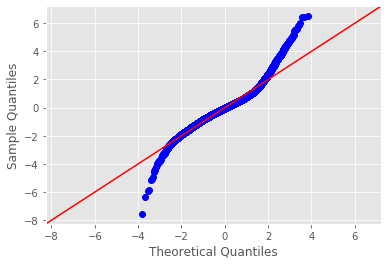

In [121]:
#Skewed distribution of residuals

plt.style.use('ggplot')

resid = model.resid

fig = sm.graphics.qqplot(resid, dist=stats.norm, line='45', fit=True)

In [122]:
#Baseline model shows a strong R2 of 0.841
#However, the residuals do not show a normal distribution
#Furthermore, multiple variables with a p-value greater than 0.05

print(("number of features w/p-value > 0.05: ") + str(len(model.pvalues[1:][model.pvalues>0.05])))
print(("total number of features: ") + str(len(x_cols)))

number of features w/p-value > 0.05: 12
total number of features: 101


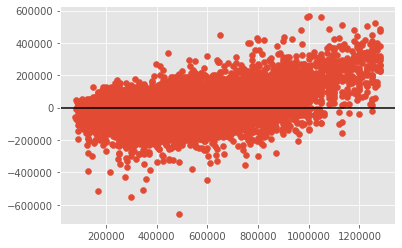

In [123]:
plt.scatter(train_df['price'],model.resid)
plt.axhline(0,color='black')

# Transforming price

Text(0, 0.5, 'number of homes')

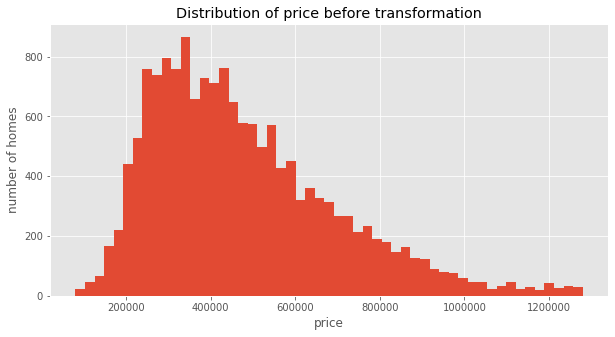

In [124]:
train_df.price.hist(bins = 'auto', figsize = (10,5));
plt.title('Distribution of price before transformation')
plt.xlabel('price')
plt.ylabel('number of homes')

In [125]:
#price is skewed to the left

In [126]:
log_price_df = train_df.copy()

In [127]:
#log transformation of price

log_price_df['price'] = log_price_df['price'].map(lambda x: np.log(x))

Text(0, 0.5, 'number of homes')

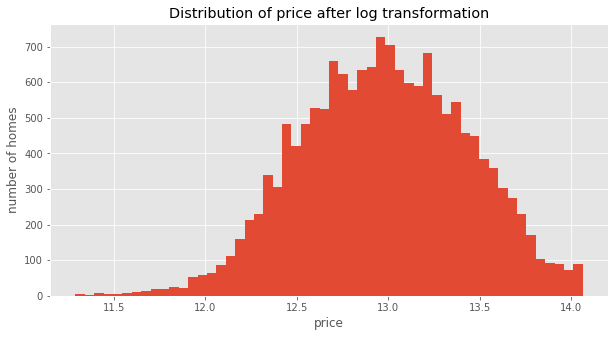

In [128]:
log_price_df.price.hist(bins = 'auto', figsize = (10,5));
plt.title('Distribution of price after log transformation')
plt.xlabel('price')
plt.ylabel('number of homes')

In [129]:
outcome = 'price'
x_cols = list(log_price_df.columns)
x_cols.remove('price')

predictors = '+'.join(x_cols)
formula = outcome + '~' + predictors

model = ols(formula=formula, data=log_price_df).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.856
Model:                            OLS   Adj. R-squared:                  0.855
Method:                 Least Squares   F-statistic:                     941.4
Date:                Sun, 01 Nov 2020   Prob (F-statistic):               0.00
Time:                        13:52:01   Log-Likelihood:                 5429.2
No. Observations:               15953   AIC:                        -1.066e+04
Df Residuals:                   15852   BIC:                            -9881.
Df Model:                         100                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept          -53.9326      8.032     -6.715      0.000     -69.676     -38.190
bedrooms            -0.0023      0.002     -1.056      0.291      -0.007       0.002
bathrooms            0.0444      0.004     12.593      0.000       0.037       0.051
sqft_living          0.0001   3.03e-06     36.518      0.000       0.000       0.000
sqft_lot           2.53e-06   2.06e-07     12.257      0.000    2.13e-06    2.93e-06
floors              -0.0315      0.004     -7.655      0.000      -0.040      -0.023
sqft_above           0.0001   3.56e-06     33.881      0.000       0.000       0.000
sqft_basement     -9.82e-06   4.76e-06     -2.063      0.039   -1.91e-05   -4.91e-07
lat                  0.4556      0.083      5.502      0.000       0.293       0.618
long                -0.3607      0.059     -6.084      0.000      -0.477      -0.244
sqft_living15     8.196e-05   4.13e-06     19.834      0.000    7.39e-05    9.01e-05
sqft_lot15       -1.001e-06   2.75e-07     -3.635      0.000   -1.54e-06   -4.61e-07
home_age             0.0007   8.35e-05      8.959      0.000       0.001       0.001
yrs_since_reno   -2.765e-05   4.19e-06     -6.606      0.000   -3.59e-05   -1.94e-05
waterfront_1_0       0.4287      0.031     13.788      0.000       0.368       0.490
view_1_0             0.1043      0.012      8.818      0.000       0.081       0.127
view_2_0             0.0954      0.007     12.936      0.000       0.081       0.110
view_3_0             0.1527      0.011     13.957      0.000       0.131       0.174
view_4_0             0.2536      0.018     14.148      0.000       0.218       0.289
condition_2          0.1573      0.040      3.890      0.000       0.078       0.237
condition_3          0.3042      0.037      8.146      0.000       0.231       0.377
condition_4          0.3520      0.037      9.419      0.000       0.279       0.425
condition_5          0.4160      0.038     11.061      0.000       0.342       0.490
grade_11             0.0429      0.021      2.013      0.044       0.001       0.085
grade_3              0.0059      0.174      0.034      0.973      -0.335       0.347
grade_4             -0.4905      0.039    -12.585      0.000      -0.567      -0.414
grade_5             -0.4158      0.017    -24.001      0.000      -0.450      -0.382
grade_6             -0.3134      0.012    -27.055      0.000      -0.336      -0.291
grade_7             -0.1975      0.010    -20.156      0.000      -0.217      -0.178
grade_8             -0.1093      0.009    -12.334      0.000      -0.127      -0.092
grade_9             -0.0255      0.009     -2.941      0.003      -0.042      -0.009
zipcode_98002       -0.0059      0.018     -0.328      0.743      -0.041       0.029
zipcode_98003       -0.0082      0.016     -0.525      0.600      -0.039       0.023
zipcode_98004        0.

In [130]:
X_train = log_price_df.drop('price',axis=1)
y_train = log_price_df.price

X_test = X_test[x_cols]

#log transforming on test y
y_test = y_test.copy()
y_test = y_test.map(lambda x: np.log(x))


linreg = LinearRegression() 
linreg.fit(X_train, y_train)
y_hat_train = linreg.predict(X_train)
y_hat_test = linreg.predict(X_test)

train_mse = mean_squared_error(y_train, y_hat_train) 
test_mse = mean_squared_error(y_test, y_hat_test) 
print('Train Mean Squarred Error:', train_mse) 
print('Test Mean Squarred Error:', test_mse)

test_mse-train_mse

Train Mean Squarred Error: 0.029643104764495363
Test Mean Squarred Error: 0.029637754908825652


-5.349855669710413e-06

In [131]:
#R2 has improved from 0.841 to 0.856
#significant decline in RMSEs (very close to 0)
#Newer model, however, has p-values > 0.05

# Dropping high p-values

In [132]:
model.pvalues.index[model.pvalues>0.05]

Index(['bedrooms', 'grade_3', 'zipcode_98002', 'zipcode_98003',
       'zipcode_98168', 'zipcode_98188', 'zipcode_98198'],
      dtype='object')

In [133]:
drop_high_p_values = ['bedrooms', 'grade_3', 'zipcode_98002', 'zipcode_98003',
       'zipcode_98168', 'zipcode_98188', 'zipcode_98198']

In [134]:
drop_high_p_df = log_price_df.drop(drop_high_p_values,axis=1)

In [135]:
outcome = 'price'
x_cols = list(drop_high_p_df.columns)
x_cols.remove('price')

predictors = '+'.join(x_cols)
formula = outcome + '~' + predictors

model = ols(formula=formula, data=drop_high_p_df).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.856
Model:                            OLS   Adj. R-squared:                  0.855
Method:                 Least Squares   F-statistic:                     1012.
Date:                Sun, 01 Nov 2020   Prob (F-statistic):               0.00
Time:                        13:52:02   Log-Likelihood:                 5426.9
No. Observations:               15953   AIC:                        -1.067e+04
Df Residuals:                   15859   BIC:                            -9944.
Df Model:                          93                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept          -52.8847      6.912     -7.651      0.000     -66.433     -39.336
bathrooms            0.0438      0.003     12.602      0.000       0.037       0.051
sqft_living          0.0001   2.81e-06     38.962      0.000       0.000       0.000
sqft_lot          2.531e-06   2.06e-07     12.268      0.000    2.13e-06    2.94e-06
floors              -0.0316      0.004     -7.693      0.000      -0.040      -0.024
sqft_above           0.0001   3.52e-06     34.099      0.000       0.000       0.000
sqft_basement    -1.041e-05   4.72e-06     -2.206      0.027   -1.97e-05   -1.16e-06
lat                  0.4507      0.054      8.295      0.000       0.344       0.557
long                -0.3540      0.056     -6.323      0.000      -0.464      -0.244
sqft_living15     8.217e-05   4.13e-06     19.915      0.000    7.41e-05    9.03e-05
sqft_lot15       -9.969e-07   2.75e-07     -3.626      0.000   -1.54e-06   -4.58e-07
home_age             0.0007   8.29e-05      8.887      0.000       0.001       0.001
yrs_since_reno   -2.787e-05   4.18e-06     -6.669      0.000   -3.61e-05   -1.97e-05
waterfront_1_0       0.4296      0.031     13.843      0.000       0.369       0.490
view_1_0             0.1047      0.012      8.869      0.000       0.082       0.128
view_2_0             0.0957      0.007     12.992      0.000       0.081       0.110
view_3_0             0.1536      0.011     14.071      0.000       0.132       0.175
view_4_0             0.2543      0.018     14.208      0.000       0.219       0.289
condition_2          0.1569      0.040      3.879      0.000       0.078       0.236
condition_3          0.3042      0.037      8.148      0.000       0.231       0.377
condition_4          0.3519      0.037      9.419      0.000       0.279       0.425
condition_5          0.4160      0.038     11.064      0.000       0.342       0.490
grade_11             0.0433      0.021      2.031      0.042       0.002       0.085
grade_4             -0.4898      0.039    -12.578      0.000      -0.566      -0.414
grade_5             -0.4165      0.017    -24.115      0.000      -0.450      -0.383
grade_6             -0.3150      0.011    -27.453      0.000      -0.337      -0.292
grade_7             -0.1988      0.010    -20.616      0.000      -0.218      -0.180
grade_8             -0.1104      0.009    -12.597      0.000      -0.128      -0.093
grade_9             -0.0262      0.009     -3.039      0.002      -0.043      -0.009
zipcode_98004        0.9260      0.022     42.596      0.000       0.883       0.969
zipcode_98005        0.6319      0.023     27.797      0.000       0.587       0.676
zipcode_98006        0.5638      0.018     31.624      0.000       0.529       0.599
zipcode_98007        0.5559      0.024     22.869      0.000       0.508       0.604
zipcode_98008        0.

In [136]:
X_train = drop_high_p_df.drop('price',axis=1)
y_train = drop_high_p_df.price

X_test = X_test[x_cols]
y_test = y_test.copy()


linreg = LinearRegression() 
linreg.fit(X_train, y_train)
y_hat_train = linreg.predict(X_train)
y_hat_test = linreg.predict(X_test)

train_mse = mean_squared_error(y_train, y_hat_train) 
test_mse = mean_squared_error(y_test, y_hat_test) 
print('Train Mean Squarred Error:', train_mse) 
print('Test Mean Squarred Error:', test_mse)

test_mse-train_mse

Train Mean Squarred Error: 0.02965152242855003
Test Mean Squarred Error: 0.02964682719373891


-4.695234811117471e-06

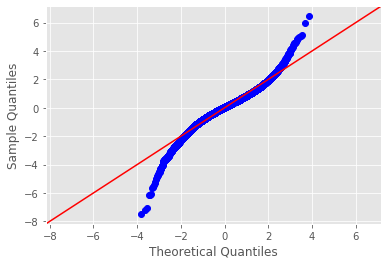

In [137]:
#Residuals remain skewed

plt.style.use('ggplot')

resid = model.resid

fig = sm.graphics.qqplot(resid, dist=stats.norm, line='45', fit=True)

# Multicolinearity

In [138]:
corr_df = drop_high_p_df.copy()
corr_df = corr_df.corr()
corr_df = corr_df[(corr_df.abs())>0.7]

In [139]:
#Checking for multicolinearity

for col in corr_df.columns:
    if len(list(corr_df.index[corr_df[col]>0]))>1:
        print("Column: " + col)
        for x in list(corr_df.index[corr_df[col]>0]):
            if x != col:
                print (x)
        print("")
    else:
        pass

Column: bathrooms
sqft_living

Column: sqft_living
bathrooms
sqft_above
sqft_living15

Column: sqft_lot
sqft_lot15

Column: sqft_above
sqft_living
sqft_living15

Column: sqft_basement
has_basement_1_0

Column: sqft_living15
sqft_living
sqft_above

Column: sqft_lot15
sqft_lot

Column: has_basement_1_0
sqft_basement



In [140]:
#drop 'bathrooms', 'sqft_above', 'sqft_living15', 
    #'sqft_lot15','sqft_basement'

In [141]:
remove_col = ['bathrooms', 'sqft_above', 'sqft_living15', 'sqft_lot15','sqft_basement']

In [142]:
drop_multi_df = drop_high_p_df.drop(remove_col,axis=1)

In [143]:
outcome = 'price'
x_cols = list(drop_multi_df.columns)
x_cols.remove('price')

predictors = '+'.join(x_cols)
formula = outcome + '~' + predictors

model = ols(formula=formula, data=drop_multi_df).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.847
Method:                 Least Squares   F-statistic:                     989.6
Date:                Sun, 01 Nov 2020   Prob (F-statistic):               0.00
Time:                        13:52:02   Log-Likelihood:                 4972.1
No. Observations:               15953   AIC:                            -9764.
Df Residuals:                   15863   BIC:                            -9073.
Df Model:                          89                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept          -55.5737      7.081     -7.848      0.000     -69.454     -41.693
sqft_living          0.0002   3.14e-06     79.554      0.000       0.000       0.000
sqft_lot          2.151e-06   1.41e-07     15.213      0.000    1.87e-06    2.43e-06
floors              -0.0046      0.004     -1.178      0.239      -0.012       0.003
lat                  0.3960      0.056      7.089      0.000       0.287       0.505
long                -0.3989      0.057     -6.958      0.000      -0.511      -0.287
home_age             0.0005   8.12e-05      6.653      0.000       0.000       0.001
yrs_since_reno   -2.593e-05   4.26e-06     -6.086      0.000   -3.43e-05   -1.76e-05
waterfront_1_0       0.4175      0.032     13.092      0.000       0.355       0.480
view_1_0             0.1248      0.012     10.334      0.000       0.101       0.149
view_2_0             0.1093      0.008     14.531      0.000       0.095       0.124
view_3_0             0.1624      0.011     14.578      0.000       0.141       0.184
view_4_0             0.2716      0.018     14.848      0.000       0.236       0.307
condition_2          0.1465      0.042      3.523      0.000       0.065       0.228
condition_3          0.2883      0.038      7.509      0.000       0.213       0.364
condition_4          0.3286      0.038      8.553      0.000       0.253       0.404
condition_5          0.3906      0.039     10.105      0.000       0.315       0.466
grade_11             0.0730      0.022      3.334      0.001       0.030       0.116
grade_4             -0.5701      0.040    -14.278      0.000      -0.648      -0.492
grade_5             -0.4954      0.017    -28.321      0.000      -0.530      -0.461
grade_6             -0.3919      0.011    -34.217      0.000      -0.414      -0.369
grade_7             -0.2584      0.010    -26.817      0.000      -0.277      -0.240
grade_8             -0.1493      0.009    -16.881      0.000      -0.167      -0.132
grade_9             -0.0413      0.009     -4.667      0.000      -0.059      -0.024
zipcode_98004        0.9774      0.022     43.978      0.000       0.934       1.021
zipcode_98005        0.6759      0.023     29.009      0.000       0.630       0.722
zipcode_98006        0.6016      0.018     33.045      0.000       0.566       0.637
zipcode_98007        0.5881      0.025     23.567      0.000       0.539       0.637
zipcode_98008        0.5735      0.022     25.547      0.000       0.529       0.617
zipcode_98010        0.3105      0.028     11.194      0.000       0.256       0.365
zipcode_98011        0.3190      0.027     11.649      0.000       0.265       0.373
zipcode_98014        0.3143      0.041      7.728      0.000       0.235       0.394
zipcode_98019        0.2887      0.034      8.484      0.000       0.222       0.355
zipcode_98022        0.

In [144]:
X_train = drop_multi_df.drop('price',axis=1)
y_train = drop_multi_df.price

X_test = X_test[x_cols]
y_test = y_test.copy()


linreg = LinearRegression() 
linreg.fit(X_train, y_train)
y_hat_train = linreg.predict(X_train)
y_hat_test = linreg.predict(X_test)

train_mse = mean_squared_error(y_train, y_hat_train) 
test_mse = mean_squared_error(y_test, y_hat_test) 
print('Train Mean Squarred Error:', train_mse) 
print('Test Mean Squarred Error:', test_mse)

test_mse-train_mse

Train Mean Squarred Error: 0.03139142864228637
Test Mean Squarred Error: 0.03121308256559906


-0.00017834607668730865

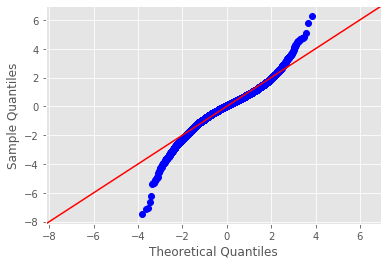

In [145]:
#Residuals remain skewed

plt.style.use('ggplot')

resid = model.resid

fig = sm.graphics.qqplot(resid, dist=stats.norm, line='45', fit=True)

In [146]:
model.pvalues[model.pvalues>0.05]

floors    0.238628
dtype: float64

In [147]:
#R2 is slightly worse 0.847 v 0.856 from previous model
#slightly greater difference between RMSEs
#floors p value > 0.05

# Further Transformations

In [148]:
drop_multi_df.columns

Index(['sqft_living', 'sqft_lot', 'floors', 'lat', 'long', 'home_age',
       'yrs_since_reno', 'waterfront_1_0', 'view_1_0', 'view_2_0', 'view_3_0',
       'view_4_0', 'condition_2', 'condition_3', 'condition_4', 'condition_5',
       'grade_11', 'grade_4', 'grade_5', 'grade_6', 'grade_7', 'grade_8',
       'grade_9', 'zipcode_98004', 'zipcode_98005', 'zipcode_98006',
       'zipcode_98007', 'zipcode_98008', 'zipcode_98010', 'zipcode_98011',
       'zipcode_98014', 'zipcode_98019', 'zipcode_98022', 'zipcode_98023',
       'zipcode_98024', 'zipcode_98027', 'zipcode_98028', 'zipcode_98029',
       'zipcode_98030', 'zipcode_98031', 'zipcode_98032', 'zipcode_98033',
       'zipcode_98034', 'zipcode_98038', 'zipcode_98039', 'zipcode_98040',
       'zipcode_98042', 'zipcode_98045', 'zipcode_98052', 'zipcode_98053',
       'zipcode_98055', 'zipcode_98056', 'zipcode_98058', 'zipcode_98059',
       'zipcode_98065', 'zipcode_98070', 'zipcode_98072', 'zipcode_98074',
       'zipcode_98075', 'zip

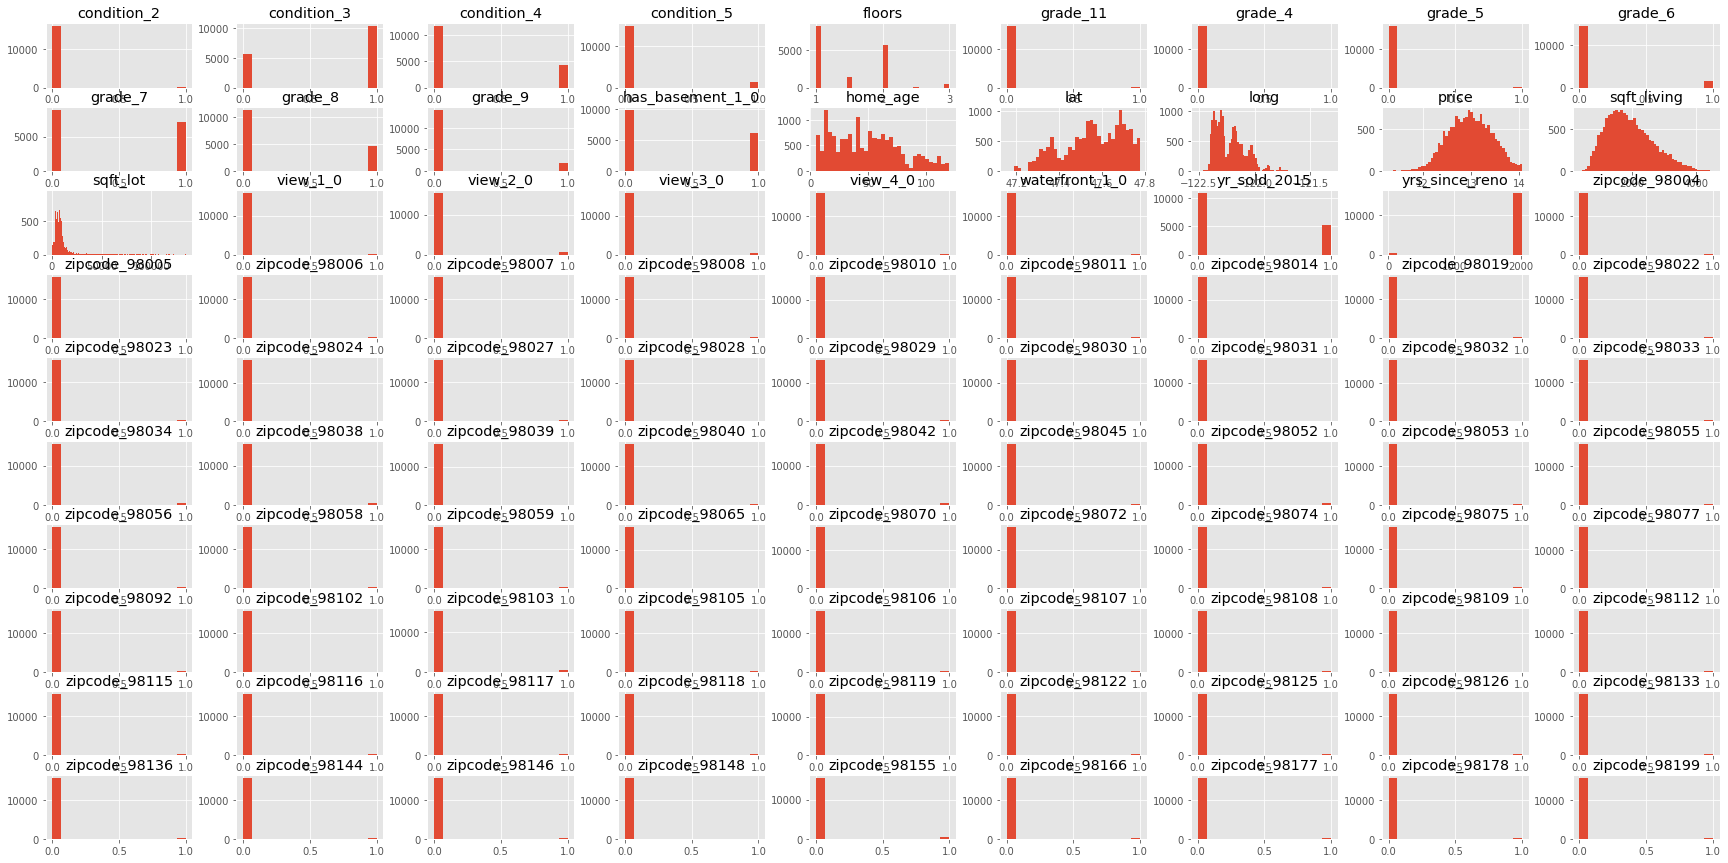

In [149]:
drop_multi_df.hist(bins = 'auto', figsize = (30,15));

In [150]:
#let's transform sqft_living, sqft_lot and home_age based on above distributions
#Let's drop lat and long because they are unnecessary (zipcode conveys same info)
#Dropping floors due to high p-value

drop_multi_df['sqft_living'] = drop_multi_df['sqft_living'].map(lambda x: np.log(x))
drop_multi_df['sqft_lot'] = drop_multi_df['sqft_lot'].map(lambda x: np.log(x))
drop_multi_df['home_age'] = drop_multi_df['home_age'].map(lambda x: np.log(x))
drop_multi_df.drop(['lat','long','floors'],axis=1,inplace=True)

In [151]:
outcome = 'price'
x_cols = list(drop_multi_df.columns)
x_cols.remove('price')

predictors = '+'.join(x_cols)
formula = outcome + '~' + predictors

model = ols(formula=formula, data=drop_multi_df).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.852
Model:                            OLS   Adj. R-squared:                  0.852
Method:                 Least Squares   F-statistic:                     1066.
Date:                Sun, 01 Nov 2020   Prob (F-statistic):               0.00
Time:                        13:52:12   Log-Likelihood:                 5243.6
No. Observations:               15953   AIC:                        -1.031e+04
Df Residuals:                   15866   BIC:                            -9645.
Df Model:                          86                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept            8.6057      0.062    139.126      0.000       8.484       8.727
sqft_living          0.4517      0.006     77.979      0.000       0.440       0.463
sqft_lot             0.0708      0.003     24.844      0.000       0.065       0.076
home_age            -0.0253      0.003     -8.210      0.000      -0.031      -0.019
yrs_since_reno   -3.707e-05   4.14e-06     -8.949      0.000   -4.52e-05   -2.89e-05
waterfront_1_0       0.4060      0.031     12.960      0.000       0.345       0.467
view_1_0             0.1327      0.012     11.180      0.000       0.109       0.156
view_2_0             0.1172      0.007     15.838      0.000       0.103       0.132
view_3_0             0.1769      0.011     16.168      0.000       0.155       0.198
view_4_0             0.2846      0.018     15.821      0.000       0.249       0.320
condition_2          0.1398      0.041      3.419      0.001       0.060       0.220
condition_3          0.2758      0.038      7.309      0.000       0.202       0.350
condition_4          0.3199      0.038      8.472      0.000       0.246       0.394
condition_5          0.3879      0.038     10.204      0.000       0.313       0.462
grade_11             0.1005      0.022      4.674      0.000       0.058       0.143
grade_4             -0.4223      0.039    -10.726      0.000      -0.500      -0.345
grade_5             -0.4192      0.017    -24.483      0.000      -0.453      -0.386
grade_6             -0.3666      0.011    -33.239      0.000      -0.388      -0.345
grade_7             -0.2874      0.009    -31.349      0.000      -0.305      -0.269
grade_8             -0.1904      0.008    -22.405      0.000      -0.207      -0.174
grade_9             -0.0700      0.009     -8.090      0.000      -0.087      -0.053
zipcode_98004        1.0523      0.016     65.692      0.000       1.021       1.084
zipcode_98005        0.7358      0.017     43.973      0.000       0.703       0.769
zipcode_98006        0.6321      0.011     57.247      0.000       0.610       0.654
zipcode_98007        0.6370      0.018     35.283      0.000       0.602       0.672
zipcode_98008        0.6164      0.013     47.118      0.000       0.591       0.642
zipcode_98010        0.1522      0.023      6.747      0.000       0.108       0.196
zipcode_98011        0.4386      0.015     29.630      0.000       0.410       0.468
zipcode_98014        0.2238      0.022     10.174      0.000       0.181       0.267
zipcode_98019        0.2819      0.016     18.162      0.000       0.251       0.312
zipcode_98022       -0.0246      0.015     -1.607      0.108      -0.055       0.005
zipcode_98023       -0.0554      0.010     -5.458      0.000      -0.075      -0.036
zipcode_98024        0.3623      0.029     12.692      0.000       0.306       0.418
zipcode_98027        0.

In [152]:
X_train = drop_multi_df.drop('price',axis=1)
y_train = drop_multi_df.price

X_test = X_test[x_cols]
X_test['sqft_living'] = X_test['sqft_living'].map(lambda x: np.log(x))
X_test['sqft_lot'] = X_test['sqft_lot'].map(lambda x: np.log(x))
X_test['home_age'] = X_test['home_age'].map(lambda x: np.log(x))
y_test = y_test.copy()



linreg = LinearRegression() 
linreg.fit(X_train, y_train)
y_hat_train = linreg.predict(X_train)
y_hat_test = linreg.predict(X_test)

train_mse = mean_squared_error(y_train, y_hat_train) 
test_mse = mean_squared_error(y_test, y_hat_test) 
print('Train Mean Squarred Error:', train_mse) 
print('Test Mean Squarred Error:', test_mse)

test_mse-train_mse

Train Mean Squarred Error: 0.03034083158816058
Test Mean Squarred Error: 0.030443674101654973


0.00010284251349439166

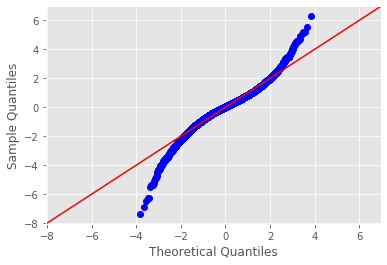

In [153]:
#Somewhat skewed distribution of residuals

plt.style.use('ggplot')

resid = model.resid

fig = sm.graphics.qqplot(resid, dist=stats.norm, line='45', fit=True)

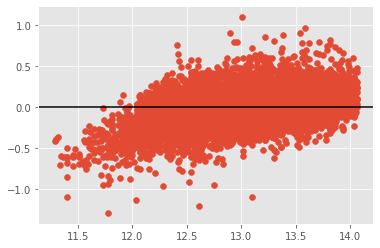

In [154]:
plt.scatter(drop_multi_df['price'],model.resid)
plt.axhline(0,color='black')

In [155]:
#R2 has improved
#RMSE difference remains low
#Residuals remain skewed
#Additional zipcode features are showing insignificant p-values
#'zipcode_98022', 'zipcode_98030', 'zipcode_98042'

# Dropping high p-values (again)

In [156]:
drop_high_p_2_df = drop_multi_df.copy()
drop_high_p_2_df.drop(['zipcode_98022', 'zipcode_98030', 'zipcode_98042'],axis=1,inplace=True)

In [157]:
outcome = 'price'
x_cols = list(drop_high_p_2_df.columns)
x_cols.remove('price')

predictors = '+'.join(x_cols)
formula = outcome + '~' + predictors

model = ols(formula=formula, data=drop_high_p_2_df).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.852
Model:                            OLS   Adj. R-squared:                  0.852
Method:                 Least Squares   F-statistic:                     1104.
Date:                Sun, 01 Nov 2020   Prob (F-statistic):               0.00
Time:                        13:52:13   Log-Likelihood:                 5240.0
No. Observations:               15953   AIC:                        -1.031e+04
Df Residuals:                   15869   BIC:                            -9667.
Df Model:                          83                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept            8.6062      0.062    139.200      0.000       8.485       8.727
sqft_living          0.4522      0.006     78.122      0.000       0.441       0.464
sqft_lot             0.0707      0.003     24.867      0.000       0.065       0.076
home_age            -0.0256      0.003     -8.347      0.000      -0.032      -0.020
yrs_since_reno   -3.682e-05   4.14e-06     -8.897      0.000   -4.49e-05   -2.87e-05
waterfront_1_0       0.4059      0.031     12.956      0.000       0.344       0.467
view_1_0             0.1323      0.012     11.146      0.000       0.109       0.156
view_2_0             0.1161      0.007     15.716      0.000       0.102       0.131
view_3_0             0.1755      0.011     16.055      0.000       0.154       0.197
view_4_0             0.2842      0.018     15.798      0.000       0.249       0.319
condition_2          0.1399      0.041      3.422      0.001       0.060       0.220
condition_3          0.2755      0.038      7.299      0.000       0.201       0.349
condition_4          0.3197      0.038      8.464      0.000       0.246       0.394
condition_5          0.3874      0.038     10.191      0.000       0.313       0.462
grade_11             0.1007      0.022      4.682      0.000       0.059       0.143
grade_4             -0.4212      0.039    -10.696      0.000      -0.498      -0.344
grade_5             -0.4192      0.017    -24.481      0.000      -0.453      -0.386
grade_6             -0.3666      0.011    -33.244      0.000      -0.388      -0.345
grade_7             -0.2872      0.009    -31.328      0.000      -0.305      -0.269
grade_8             -0.1902      0.008    -22.387      0.000      -0.207      -0.174
grade_9             -0.0698      0.009     -8.067      0.000      -0.087      -0.053
zipcode_98004        1.0493      0.016     66.755      0.000       1.018       1.080
zipcode_98005        0.7326      0.016     44.595      0.000       0.700       0.765
zipcode_98006        0.6291      0.011     59.500      0.000       0.608       0.650
zipcode_98007        0.6338      0.018     35.653      0.000       0.599       0.669
zipcode_98008        0.6135      0.013     48.255      0.000       0.589       0.638
zipcode_98010        0.1492      0.022      6.686      0.000       0.105       0.193
zipcode_98011        0.4354      0.014     30.108      0.000       0.407       0.464
zipcode_98014        0.2207      0.022     10.151      0.000       0.178       0.263
zipcode_98019        0.2786      0.015     18.375      0.000       0.249       0.308
zipcode_98023       -0.0586      0.010     -6.066      0.000      -0.077      -0.040
zipcode_98024        0.3595      0.028     12.671      0.000       0.304       0.415
zipcode_98027        0.5080      0.011     44.599      0.000       0.486       0.530
zipcode_98028        0.

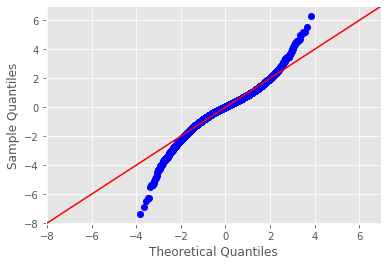

In [158]:
#Somewhat skewed distribution of residuals

plt.style.use('ggplot')

resid = model.resid

fig = sm.graphics.qqplot(resid, dist=stats.norm, line='45', fit=True)

In [159]:
#R2 is unchanged, no features with high p value
#Residuals remain skewed

# Reducing the number of features (Final Model)

In [160]:
#we're working with many features
#What is the impact of using fewer features

In [161]:
#taking top 50 features

high_corr_df = drop_high_p_2_df.copy()
corr = high_corr_df.corr().abs()
high_corr_cols = list(corr['price'].sort_values(ascending=False)[:50].index)

In [162]:
high_corr_df = high_corr_df[high_corr_cols]
high_corr_df.head()

,price,sqft_living,grade_9,grade_6,grade_7,grade_8,has_basement_1_0,zipcode_98023,zipcode_98040,grade_5,...,zipcode_98053,yrs_since_reno,zipcode_98029,zipcode_98116,zipcode_98102,zipcode_98109,grade_4,zipcode_98122,zipcode_98027,zipcode_98008
15489,12.899220,7.673223,0,0,0,1,0,0,0,0,...,0,2020,0,0,0,0,0,0,0,0
20615,12.948010,7.319202,0,0,0,1,0,0,0,0,...,0,2020,0,0,0,0,0,0,0,0
2128,12.380026,6.992096,0,1,0,0,0,0,0,0,...,0,11,0,0,0,0,0,0,0,0
12438,12.474190,7.461640,0,0,1,0,0,0,0,0,...,0,2020,0,0,0,0,0,0,0,0
6282,11.877569,7.130899,0,1,0,0,0,0,0,0,...,0,2020,0,0,0,0,0,0,0,0


In [350]:
outcome = 'price'
x_cols = list(high_corr_df.columns)
x_cols.remove('price')

predictors = '+'.join(x_cols)
formula = outcome + '~' + predictors

model = ols(formula=formula, data=high_corr_df).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.736
Model:                            OLS   Adj. R-squared:                  0.735
Method:                 Least Squares   F-statistic:                     903.1
Date:                Sun, 01 Nov 2020   Prob (F-statistic):               0.00
Time:                        22:19:38   Log-Likelihood:                 590.01
No. Observations:               15953   AIC:                            -1080.
Df Residuals:                   15903   BIC:                            -696.2
Df Model:                          49                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept            9.8079      0.061    160.084      0.000       9.688       9.928
sqft_living          0.4301      0.007     59.848      0.000       0.416       0.444
grade_9             -0.0857      0.012     -7.439      0.000      -0.108      -0.063
grade_6             -0.5061      0.014    -35.061      0.000      -0.534      -0.478
grade_7             -0.3896      0.012    -32.416      0.000      -0.413      -0.366
grade_8             -0.2406      0.011    -21.446      0.000      -0.263      -0.219
has_basement_1_0     0.0142      0.004      3.294      0.001       0.006       0.023
zipcode_98023       -0.3913      0.012    -32.521      0.000      -0.415      -0.368
zipcode_98040        0.4964      0.019     25.897      0.000       0.459       0.534
grade_5             -0.6092      0.022    -27.105      0.000      -0.653      -0.565
zipcode_98006        0.2818      0.013     21.330      0.000       0.256       0.308
view_2_0             0.1344      0.010     13.755      0.000       0.115       0.154
zipcode_98004        0.6958      0.020     34.041      0.000       0.656       0.736
zipcode_98075        0.2527      0.016     16.103      0.000       0.222       0.283
zipcode_98033        0.4161      0.014     30.443      0.000       0.389       0.443
view_3_0             0.1735      0.015     11.959      0.000       0.145       0.202
view_4_0             0.3920      0.021     18.481      0.000       0.350       0.434
zipcode_98052        0.2815      0.012     24.070      0.000       0.259       0.304
grade_11             0.1226      0.029      4.276      0.000       0.066       0.179
zipcode_98112        0.5384      0.020     26.541      0.000       0.499       0.578
home_age             0.0551      0.003     17.227      0.000       0.049       0.061
zipcode_98074        0.2028      0.014     14.734      0.000       0.176       0.230
zipcode_98178       -0.2330      0.017    -13.672      0.000      -0.266      -0.200
zipcode_98199        0.4194      0.016     25.937      0.000       0.388       0.451
zipcode_98092       -0.3350      0.015    -22.041      0.000      -0.365      -0.305
zipcode_98031       -0.2663      0.016    -16.589      0.000      -0.298      -0.235
zipcode_98106       -0.0682      0.015     -4.699      0.000      -0.097      -0.040
zipcode_98115        0.3975      0.012     34.291      0.000       0.375       0.420
zipcode_98032       -0.4037      0.023    -17.402      0.000      -0.449      -0.358
zipcode_98055       -0.2080      0.017    -12.576      0.000      -0.240      -0.176
zipcode_98005        0.3952      0.021     18.466      0.000       0.353       0.437
zipcode_98119        0.5065      0.021     24.502      0.000       0.466       0.547
zipcode_98105        0.5051      0.020     25.521      0.000       0.466       0.544
view_1_0             0.

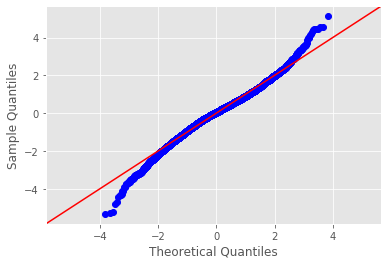

In [351]:
#Somewhat skewed distribution of residuals

plt.style.use('ggplot')

resid = model.resid

fig = sm.graphics.qqplot(resid, dist=stats.norm, line='45', fit=True)

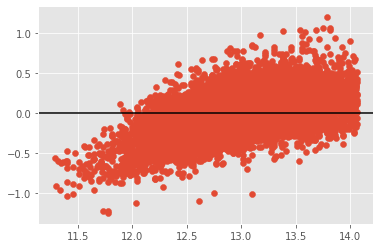

In [352]:
plt.scatter(drop_multi_df['price'],model.resid)
plt.axhline(0,color='black')

In [353]:
model.pvalues.index[model.pvalues>0.05]

Index([], dtype='object')

In [354]:
X_train = high_corr_df.drop('price',axis=1)
y_train = high_corr_df.price

X_test = X_test[x_cols]
y_test = y_test.copy()



linreg = LinearRegression() 
linreg.fit(X_train, y_train)
y_hat_train = linreg.predict(X_train)
y_hat_test = linreg.predict(X_test)

train_mse = mean_squared_error(y_train, y_hat_train) 
test_mse = mean_squared_error(y_test, y_hat_test) 
print('Train Mean Squarred Error:', train_mse) 
print('Test Mean Squarred Error:', test_mse)

test_mse-train_mse

Train Mean Squarred Error: 0.054375263424608966
Test Mean Squarred Error: 0.05540312088300247


0.0010278574583935038

In [355]:
#R2 dropped slightly to 0.736, however our residuals are greatly improved
#RMSE difference is small

In [359]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score

cv_10_results = cross_val_score(linreg, high_corr_df[x_cols], high_corr_df['price'], cv=10,  scoring='neg_mean_squared_error')
print(cv_10_results)
np.mean(cv_10_results)

[-0.0539566  -0.05097343 -0.0551433  -0.053736   -0.0624218  -0.05402931
 -0.05664702 -0.05363172 -0.05257223 -0.0539666 ]


-0.05470780116049166

# Interpreation of Model + Resolving Our Questions

As a refresher, this was our statement of purpose (outlined in part_1 of this project):

We will be exploring the King County House Sale dataset with a multivariable linear regression to predict the sale price of homes in the area. Hopefully, we'll be able to leverage the insights in this analysis to determing the most important features of a home before we open our own construction business.

Key questions:


- Which features of a home have the greatest impact on home price?

- Which areas of King County should we consider building in?

- How can we improve the potential sale price of a home?

## Which features of a home have the greatest impact on home price?

As outlined below, the zipcode a home is located in, the grade of a home (referring to the construction quality) and the liveable sqft have the biggest impact on the price of a home.

For example, a home located in zipcode 98004 increases the sale price of a home by 101%. 

A 1% increase in square footage will increase home price by 0.4%.

Having a basement increases home sale price by 1.4%.

Having a home with a grade of 6 will decrease your home value by 40%.

In [372]:
#Top 15 most impactful features (largest coefficient) 

coefficients = pd.DataFrame(model.params)
coefficients.reset_index(drop=True,inplace=True)
coefficients['coefficients'] = coefficients[0]
coefficients.drop(0,axis=1,inplace=True)
coefficients['feature'] = model.params.index
coefficients.set_index('feature',drop=True,inplace=True)
del coefficients.index.name
coefficients.reindex(coefficients.coefficients.abs().sort_values(ascending=False).index)
top_15 = coefficients[:15].copy()
top_15.sort_values('coefficients',ascending=False)

,coefficients
Intercept,9.807862
zipcode_98004,0.695797
zipcode_98040,0.496420
sqft_living,0.430077
zipcode_98033,0.416055
zipcode_98006,0.281822
zipcode_98075,0.252652
view_2_0,0.134445
has_basement_1_0,0.014204
grade_9,-0.085734


### Calculations of Coefficient Interpretations

In [378]:
#We log transformed price, so finding the impact of each feature through exponent.

change_in_price = []

for x in top_15.coefficients:
    a = round((np.exp(x)-1)*100,1)
    change_in_price.append(a)

In [381]:
#We also log transformed sqft_living so using log-log interpretation method

top_15.loc['sqft_living','change'] = (round(((1.01**0.430077)-1)*100,1))
top_15

,coefficients,change
Intercept,9.807862,1817509.0
sqft_living,0.430077,0.4
grade_9,-0.085734,-8.2
grade_6,-0.506110,-39.7
grade_7,-0.389638,-32.3
grade_8,-0.240607,-21.4
has_basement_1_0,0.014204,1.4
zipcode_98023,-0.391342,-32.4
zipcode_98040,0.496420,64.3
grade_5,-0.609204,-45.6


## Which areas of King County should we consider building in?


Areas closer to Seattle: Bellevue, Mercer Island and Kirkland

In [384]:
top_15[top_15.index.str.contains('zip')]

,coefficients,change
zipcode_98023,-0.391342,-32.4
zipcode_98040,0.496420,64.3
zipcode_98006,0.281822,32.6
zipcode_98004,0.695797,100.5
zipcode_98075,0.252652,28.7
zipcode_98033,0.416055,51.6


## How can we improve the potential sale price of a home?

We don't only have to build homes on empty lots. We can also consider conducting remodels and focus on using higher grade materials as well as building extensions to increase the square footage of a home. 

# Presentation Charts

In [170]:
high_corr_df

,price,sqft_living,grade_9,grade_6,grade_7,grade_8,has_basement_1_0,zipcode_98023,zipcode_98040,grade_5,...,zipcode_98053,yrs_since_reno,zipcode_98029,zipcode_98116,zipcode_98102,zipcode_98109,grade_4,zipcode_98122,zipcode_98027,zipcode_98008
15489,12.899220,7.673223,0,0,0,1,0,0,0,0,...,0,2020,0,0,0,0,0,0,0,0
20615,12.948010,7.319202,0,0,0,1,0,0,0,0,...,0,2020,0,0,0,0,0,0,0,0
2128,12.380026,6.992096,0,1,0,0,0,0,0,0,...,0,11,0,0,0,0,0,0,0,0
12438,12.474190,7.461640,0,0,1,0,0,0,0,0,...,0,2020,0,0,0,0,0,0,0,0
6282,11.877569,7.130899,0,1,0,0,0,0,0,0,...,0,2020,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11959,12.301156,6.966024,0,0,1,0,0,0,0,0,...,0,2020,0,0,0,0,0,0,0,0
12682,13.614618,8.299037,0,0,0,0,0,0,0,0,...,0,2020,0,0,0,0,0,0,0,0
5716,13.253392,7.779049,0,0,0,1,1,0,0,0,...,0,2020,0,0,0,0,0,0,0,0
911,13.805460,7.930206,0,0,1,0,1,0,0,0,...,0,2020,0,0,0,0,0,0,0,0


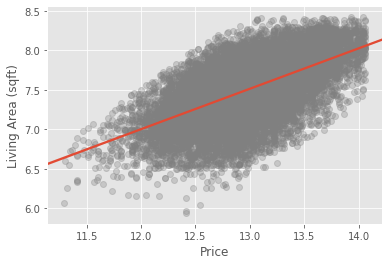

In [186]:
ax = sns.regplot(x="price", y="sqft_living", data=high_corr_df,scatter_kws={'alpha':0.3,'color':'grey'})
ax.set(xlabel='Price', ylabel='Living Area (sqft)')
plt.show()

In [345]:
grade_final = high_corr_df.loc[:, high_corr_df.columns.str.startswith(('price','grade'))]
grade_final

,price,grade_9,grade_6,grade_7,grade_8,grade_5,grade_11,grade_4
15489,12.899220,0,0,0,1,0,0,0
20615,12.948010,0,0,0,1,0,0,0
2128,12.380026,0,1,0,0,0,0,0
12438,12.474190,0,0,1,0,0,0,0
6282,11.877569,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...
11959,12.301156,0,0,1,0,0,0,0
12682,13.614618,0,0,0,0,0,0,0
5716,13.253392,0,0,0,1,0,0,0
911,13.805460,0,0,1,0,0,0,0


In [346]:
grade_final.loc[(grade_final['grade_9'] == 1),'Grade'] = 9
grade_final.loc[(grade_final['grade_6'] == 1),'Grade'] = 6
grade_final.loc[(grade_final['grade_7'] == 1),'Grade'] = 7
grade_final.loc[(grade_final['grade_8'] == 1),'Grade'] = 8
grade_final.loc[(grade_final['grade_5'] == 1),'Grade'] = 5
grade_final

,price,grade_9,grade_6,grade_7,grade_8,grade_5,grade_11,grade_4,Grade
15489,12.899220,0,0,0,1,0,0,0,8.0
20615,12.948010,0,0,0,1,0,0,0,8.0
2128,12.380026,0,1,0,0,0,0,0,6.0
12438,12.474190,0,0,1,0,0,0,0,7.0
6282,11.877569,0,1,0,0,0,0,0,6.0
...,...,...,...,...,...,...,...,...,...
11959,12.301156,0,0,1,0,0,0,0,7.0
12682,13.614618,0,0,0,0,0,0,0,NaN
5716,13.253392,0,0,0,1,0,0,0,8.0
911,13.805460,0,0,1,0,0,0,0,7.0


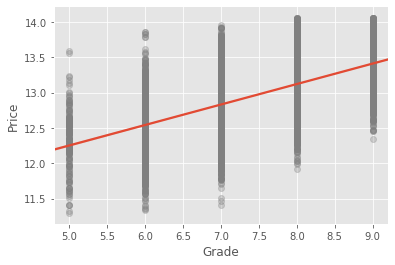

In [348]:
ax = sns.regplot(x="Grade", y="price", data=grade_final,scatter_kws={'alpha':0.3,'color':'grey'})
ax.set(xlabel='Grade', ylabel='Price')
plt.show()